In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd
plt.rcParams.update({'font.size': 12})

## Training period

In [2]:
results_dir = os.getcwd()

In [3]:
def find_csv_filenames( path_to_dir, suffix=".csv" ):
    filenames = os.listdir(path_to_dir)
    return [ filename for filename in filenames if filename.endswith( suffix ) ]

In [5]:
result_files = find_csv_filenames(results_dir)
result_files

['experiment_000_RANDOM_step_results.csv',
 'experiment_10_PPO_step_results.csv',
 'experiment_11_A2C_step_results.csv',
 'experiment_12_DQN_step_results.csv',
 'experiment_13_PPO_step_results.csv',
 'experiment_14_A2C_step_results.csv',
 'experiment_15_DQN_step_results.csv',
 'experiment_16_PPO_step_results.csv',
 'experiment_17_A2C_step_results.csv',
 'experiment_18_DQN_step_results.csv',
 'experiment_19_PPO_step_results.csv',
 'experiment_1_PPO_step_results.csv',
 'experiment_20_A2C_step_results.csv',
 'experiment_21_DQN_step_results.csv',
 'experiment_22_PPO_step_results.csv',
 'experiment_23_A2C_step_results.csv',
 'experiment_24_DQN_step_results.csv',
 'experiment_2_A2C_step_results.csv',
 'experiment_3_DQN_step_results.csv',
 'experiment_4_PPO_step_results.csv',
 'experiment_5_A2C_step_results.csv',
 'experiment_6_DQN_step_results.csv',
 'experiment_7_PPO_step_results.csv',
 'experiment_8_A2C_step_results.csv',
 'experiment_9_DQN_step_results.csv']

In [7]:
results = {}
index = 0
for result_file in result_files:
    results[index] = pd.read_csv(os.path.join(results_dir, result_file))
    index += 1

In [5]:
experiment_configuration = {}
experiment_configuration[1] = {'algo': 'PPO', 'incentive': 'no'}
experiment_configuration[2] = {'algo': 'A2C', 'incentive': 'no'}
experiment_configuration[3] = {'algo': 'DQN', 'incentive': 'no'}
experiment_configuration[4] = {'algo': 'PPO', 'incentive': 'time'}
experiment_configuration[5] = {'algo': 'A2C', 'incentive': 'time'}
experiment_configuration[6] = {'algo': 'DQN', 'incentive': 'time'} corrupted
experiment_configuration[7] = {'algo': 'PPO', 'incentive': 'episodic'}
experiment_configuration[8] = {'algo': 'A2C', 'incentive': 'episodic'}
experiment_configuration[9] = {'algo': 'DQN', 'incentive': 'episodic'}
experiment_configuration[10] = {'algo': 'PPO', 'incentive': 'time, episodic'}
experiment_configuration[11] = {'algo': 'A2C', 'incentive': 'time, episodic'}
experiment_configuration[12] = {'algo': 'DQN', 'incentive': 'time, episodic'}
experiment_configuration[13] = {'algo': 'PPO', 'incentive': 'thresholding'}
experiment_configuration[14] = {'algo': 'A2C', 'incentive': 'thresholding'}
experiment_configuration[15] = {'algo': 'DQN', 'incentive': 'thresholding'}
experiment_configuration[16] = {'algo': 'PPO', 'incentive': 'time, thresholding'}
experiment_configuration[17] = {'algo': 'A2C', 'incentive': 'time, thresholding'}
experiment_configuration[18] = {'algo': 'DQN', 'incentive': 'time, thresholding'}
experiment_configuration[19] = {'algo': 'PPO', 'incentive': 'episodic, thresholding'}
experiment_configuration[20] = {'algo': 'A2C', 'incentive': 'episodic, thresholding'}
experiment_configuration[21] = {'algo': 'DQN', 'incentive': 'episodic, thresholding'}
experiment_configuration[22] = {'algo': 'PPO', 'incentive': 'time, episodic, thresholding'}
experiment_configuration[23] = {'algo': 'A2C', 'incentive': 'time, episodic, thresholding'}
experiment_configuration[24] = {'algo': 'DQN', 'incentive': 'time, episodic, thresholding'}

In [48]:
exp_nrs = {}
exp_nrs['PPO'] = [1, 4, 7, 10, 13, 16, 19, 22]
exp_nrs['A2C'] = [2, 5, 8, 11, 14, 17, 20, 23]
exp_nrs['DQN'] = [3, 6, 9, 12, 15, 18, 21, 24]

In [38]:
def plot_episode_boxplots(experiment_number, config):
    result = results[experiment_number][['Step', 'Value']].rename(columns={'Value':'Reward'})
    result['Episode'] = result['Step']/10000
    result['Episode'] = result['Episode'].apply(int)
    fig = plt.figure()
    ax = sns.boxplot(data=result, x='Episode', y='Reward', 
            showmeans=True, palette="Blues",
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
    ax.set_title('Development of reward for {},\n {} incentive'.format(config['algo'], config['incentive']))

In [11]:
def plot_episode_lineplot(experiment_number, config, ci=None):
    result = results[experiment_number][['Step', 'Value']].rename(columns={'Value':'Reward'})
    result['Episode'] = result['Step']/10000
    result['Episode'] = result['Episode'].apply(int)
    fig = plt.figure()
    ax = sns.lineplot(data=result, x='Episode', y='Reward', ci=ci)
    ax.set_title('Development of reward for {}, {} incentive'.format(config['algo'], config['incentive']))

In [20]:
def plot_episode_lineplot_multi(experiment_numbers):
    results_to_plot = pd.DataFrame()
    for experiment_number in experiment_numbers:
        config = experiment_configuration[experiment_number]
        result = results[experiment_number][['Step', 'Value']].rename(columns={'Value':'Reward'})
        result['Episode'] = result['Step']/10000
        result['Episode'] = result['Episode'].apply(int)
        result['Algorithm'] = config['algo']
        results_to_plot = pd.concat([result, results_to_plot])
    fig = plt.figure()
    ax = sns.lineplot(data=results_to_plot, x='Episode', y='Reward', hue='Algorithm')
    ax.set_title('Development of reward for {} incentive'.format(config['incentive']))

## Model and Incentive Comparison

In [37]:
def plot_experiments(results_dir, algo, y_lim=None):
    reward_files = os.listdir(results_dir + '/' + algo)
    results = pd.DataFrame()
    # import results
    for file in reward_files:
        str_parts = file.split('_')
        experiment_nr = str_parts[1]
        result = pd.read_csv(os.path.join(results_dir, algo, file),header=None).rename(columns={0:'Reward'})
        result['exp_nr'] = experiment_nr
        results = pd.concat([results, result])
    # get experiment nr
    exp_nrs = [int(nr) for nr in list(results['exp_nr'].unique())]
    list.sort(exp_nrs)
    # create boxplots
    ax = sns.boxplot(data=results, x='exp_nr', y='Reward', 
            showmeans=True, palette="Blues",
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"},   order=[str(nr) for nr in exp_nrs])
    ax.set_title('Reward for {}'.format(algo))
    if y_lim is not None:
        ax.set_ylim(y_lim)
    return ax

In [29]:
end_results = pd.DataFrame()
for exp_nr, step_result in results.items():
    res = step_result.iloc[:,-1]
    res.name = 'Reward'
    res_df = pd.DataFrame()
    res_df['Reward'] = res
    res_df['exp_nr'] = exp_nr
    end_results = pd.concat([end_results, res_df])
end_results.head()

,Reward,exp_nr
0,500.0,0
1,200.0,0
2,100.0,0
3,1200.0,0
4,0.0,0


In [30]:
general_res = end_results.groupby(['exp_nr']).min().rename(columns={'Reward':'min'})
general_res['max'] = end_results.groupby(['exp_nr']).max()
general_res['mean'] = end_results.groupby(['exp_nr']).mean()
general_res['median'] = end_results.groupby(['exp_nr']).median()

In [31]:
general_res

,min,max,mean,median
exp_nr,,,,
0,0.0,1200.0,522.222222,500.0
1,200.0,1000.0,688.888889,900.0
2,200.0,1100.0,633.333333,700.0
3,100.0,1100.0,522.222222,400.0
4,0.0,800.0,400.000000,200.0
5,0.0,1100.0,633.333333,700.0
6,0.0,500.0,266.666667,300.0
7,100.0,1000.0,411.111111,300.0
8,400.0,1300.0,788.888889,700.0


### PPO

In [33]:
exp_nrs_PPO = [1, 4, 7, 10, 13, 16, 19, 22]

Text(0.5, 1.0, 'Reward for PPO')

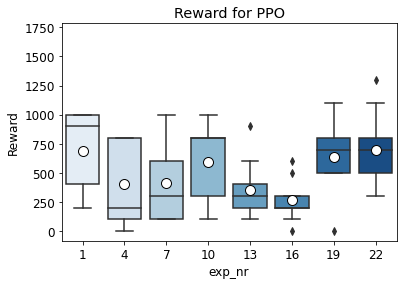

In [45]:
exp_nrs_PPO
results_PPO = end_results.loc[end_results.exp_nr.isin(exp_nrs_PPO)]

ax_PPO = sns.boxplot(data=results_PPO, x='exp_nr', y='Reward', 
            showmeans=True, palette="Blues",
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
ax_PPO.set_ylim((-85.0, 1785.0))
ax_PPO.set_title('Reward for PPO')

### A2C

Text(0.5, 1.0, 'Reward for A2C')

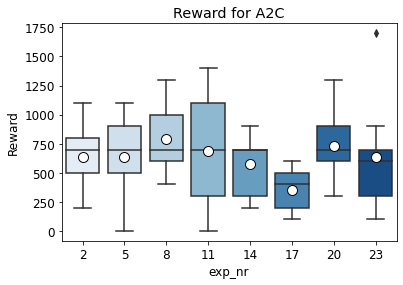

In [46]:
exp_nrs_A2C = [2, 5, 8, 11, 14, 17, 20, 23]
results_A2C = end_results.loc[end_results.exp_nr.isin(exp_nrs_A2C)]

ax_A2C = sns.boxplot(data=results_A2C, x='exp_nr', y='Reward', 
            showmeans=True, palette="Blues",
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
ax_A2C.set_title('Reward for A2C')

In [44]:
ax_A2C.get_ylim()

(-85.0, 1785.0)

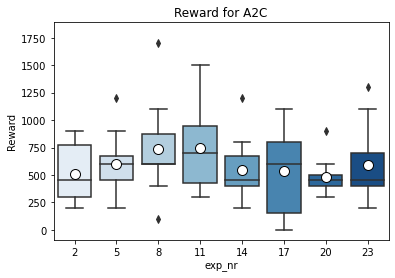

In [48]:
ax_A2C = plot_experiments(results_dir, 'A2C', y_lim=ax_PPO.get_ylim())

### DQN

Text(0.5, 1.0, 'Reward for DQN')

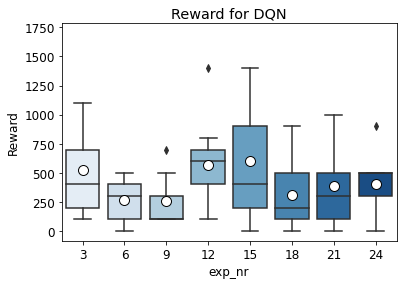

In [47]:
exp_nrs_DQN= [3, 6, 9, 12, 15, 18, 21, 24]
results_DQN = end_results.loc[end_results.exp_nr.isin(exp_nrs_DQN)]

ax_DQN = sns.boxplot(data=results_DQN, x='exp_nr', y='Reward', 
            showmeans=True, palette="Blues",
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
ax_DQN.set_ylim((-85.0, 1785.0))
ax_DQN.set_title('Reward for DQN')

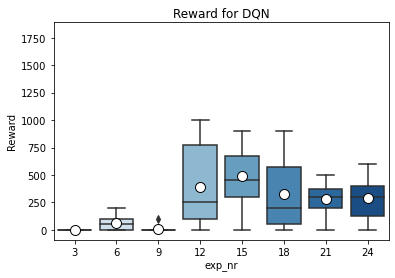

In [57]:
ax_DQN=plot_experiments(results_dir, 'DQN', y_lim=ax_PPO.get_ylim())

# Overall results

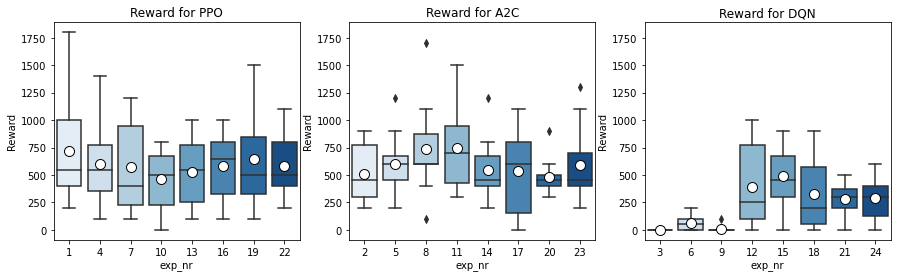

In [61]:
plt.figure(figsize=(15,4))
plt.subplot(131)
ax_PPO = plot_experiments(results_dir, 'PPO')
plt.subplot(132)
ax_A2C = plot_experiments(results_dir, 'A2C', y_lim=ax_PPO.get_ylim())
plt.subplot(133)
ax_DQN=plot_experiments(results_dir, 'DQN', y_lim=ax_PPO.get_ylim())
plt.savefig('reward_comparison.pdf')

In [64]:
def plot_minerals(results_dir, algo, y_lim=None):
    reward_files = os.listdir(results_dir + '/' + algo)
    results = pd.DataFrame()
    # import results
    for file in reward_files:
        str_parts = file.split('_')
        experiment_nr = str_parts[1]
        result = pd.read_csv(os.path.join(results_dir, algo, file),header=None).rename(columns={0:'Number of minerals'})/100
        result['exp_nr'] = experiment_nr
        results = pd.concat([results, result])
    # get experiment nr
    exp_nrs = [int(nr) for nr in list(results['exp_nr'].unique())]
    list.sort(exp_nrs)
    # create boxplots
    ax = sns.boxplot(data=results, x='exp_nr', y='Number of minerals', 
            showmeans=True, palette="Blues",
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"},   order=[str(nr) for nr in exp_nrs])
    ax.set_title('{}'.format(algo))
    
    if y_lim is not None:
        ax.set_ylim(y_lim)
        ax.axes.yaxis.set_visible(False)
    return ax

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


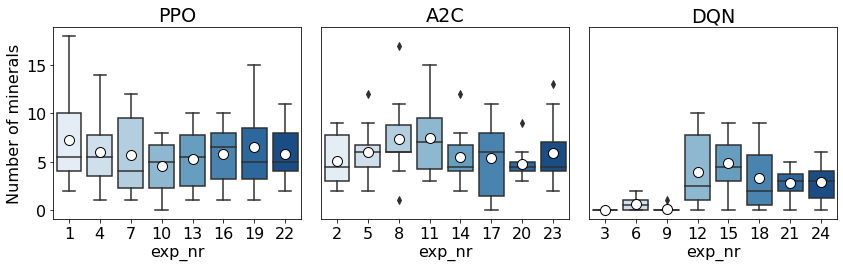

In [78]:
from matplotlib import rc
plt.rcParams.update({'font.size': 16})
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), sharey=True)
plt.axes(ax1)
ax_PPO = plot_minerals(results_dir, 'PPO')
plt.axes(ax2)
ax_A2C = plot_minerals(results_dir, 'A2C', y_lim=ax_PPO.get_ylim())
plt.axes(ax3)
ax_DQN=plot_minerals(results_dir, 'DQN', y_lim=ax_PPO.get_ylim())
plt.tight_layout()
plt.savefig('mineral_comparison.pdf')

In [66]:
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

In [57]:
def plot_minerals_v2(results, algo, exp_nrs, y_lim=(-90.0, 1890.0), hide_axis=False):
    # get experiment nr
    exp_nrs_algo = exp_nrs[algo]
    results_algo = end_results.loc[end_results.exp_nr.isin(exp_nrs_algo)]
    # create boxplots
    ax = sns.boxplot(data=results_algo, x='exp_nr', y='Reward', 
            showmeans=True, palette="Blues",
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
    ax.set_title('{}'.format(algo))
    
    if y_lim is not None:
        ax.set_ylim(y_lim)
    if hide_axis:
        ax.axes.yaxis.set_visible(False)
    return ax

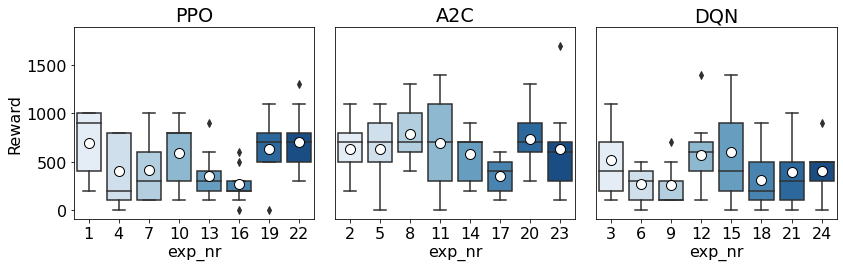

In [58]:
from matplotlib import rc
plt.rcParams.update({'font.size': 16})
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), sharey=True)
plt.axes(ax1)
ax_PPO = plot_minerals_v2(results_dir, 'PPO', exp_nrs)
plt.axes(ax2)
ax_A2C = plot_minerals_v2(results_dir, 'A2C', exp_nrs, hide_axis=True)
plt.axes(ax3)
ax_DQN=plot_minerals_v2(results_dir, 'DQN', exp_nrs, hide_axis=True)
plt.tight_layout()
plt.savefig('mineral_comparison_v2.pdf')